# modelillo logístico

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, top_k_accuracy_score, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_parquet('X_train.parquet')
y_train = pd.read_parquet('y_train.parquet')

X_validation = pd.read_parquet('X_validation.parquet')
y_validation = pd.read_parquet('y_validation.parquet')

X_test = pd.read_parquet('X_test.parquet')
y_test = pd.read_parquet('y_test.parquet')

In [3]:
lr = LogisticRegression().fit(X_train, y_train)

/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
X_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [4]:
lr.intercept_, lr.coef_

(array([-1.21417626]),
 array([[-0.08548249, -0.14859586,  0.20064385, -0.04699523, -0.76345682,
         -0.57907282,  0.01652447, -0.09350219, -0.17165259, -0.07666378,
         -0.47527212,  0.0148628 , -1.48735517, -0.33655602, -0.24988093,
         -0.36405473, -0.09492839, -0.14263551, -0.02307823, -0.43545054,
         -1.28274188,  0.50705861]]))

In [5]:
def top_20_accuracy(y_true, y_score): return top_k_accuracy_score(y_true, y_score, k=20, normalize=True)
metrics = [roc_auc_score, top_20_accuracy]

results_lr = pd.DataFrame()
for k,v in {'train':(X_train,y_train), 'test':(X_test,y_test)}.items():
    y_hat = lr.predict_proba(v[0])[:,1]
    results_lr = pd.concat([
        results_lr,
        pd.DataFrame(
            [(k, m.__name__ , m(v[1], y_hat)) for m in metrics],
            columns =['dataset', 'metric', 'value']
        )        
    ])
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_lr

/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1777: UndefinedMetricWarning: 'k' (20) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
/shared-libs/python3.8/py/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1777: UndefinedMetricWarning: 'k' (20) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


,dataset,metric,value
0,train,roc_auc_score,0.857
1,train,top_20_accuracy,1.000
0,test,roc_auc_score,0.844
1,test,top_20_accuracy,1.000


In [6]:
fpr, tpr, _ = roc_curve(y_test, y_hat)

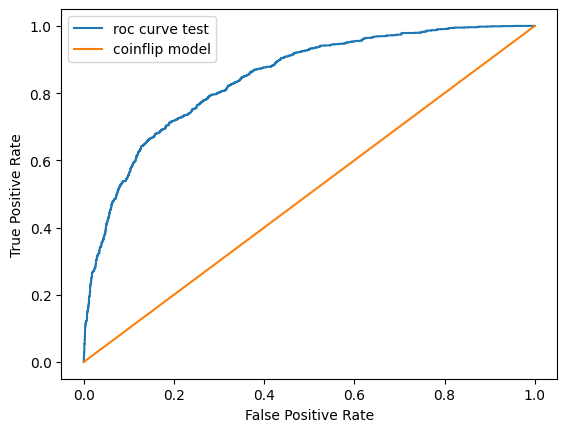

In [7]:
plt.plot(fpr,tpr, label='roc curve test')
plt.plot(np.linspace(0,1),np.linspace(0,1), label='coinflip model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

Una curva ROC representa TPR frente a FPR en diferentes umbrales de clasificación.
AUC significa "área bajo la curva ROC". 
El AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.
El AUC varía en valor de 0 a 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; uno cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca563382-6f70-4aa4-99f1-efca4704b6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>